# Data Science Fundamentals (90001) - Final Project
## ASD (Autism Spectrum Disorder) - Prediction based on Phenotypic Data
### Tali Aharon 034791236

### Import

In [226]:
# Basic libraries for data handeling
import pandas as pd
import numpy as np

# For exploring and ploting the data
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy as scip

# For preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# For preprocessing and for train-test-predict-evaluate...
from sklearn.pipeline import Pipeline

# For train-test-predict
from sklearn.model_selection import train_test_split, GridSearchCV

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans as KMeans

# For evaluating our models
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix as confusion_matrix

# I removed warnings to get a clean notebook/pdf
import warnings
warnings.filterwarnings('ignore')


## Exploratory Data Analysis
### Load and Preview the data:
We start with 2 CSV files: "ABIDEII_Composite_Phenotypic" and "ABIDEII_Long_Composite_Phenotypic".

In [227]:
# Load CSV data files
df = pd.read_csv('ABIDEII_Composite_Phenotypic.csv', encoding='windows-1252')
#df.columns = [x.lower() for x in df.columns]

df_long = pd.read_csv('ABIDEII_Long_Composite_Phenotypic.csv', encoding='windows-1252')
#df_long.columns = [x.lower() for x in df_long.columns]

# selecting rows from df_long where SESSION='Baseline'
df_long_baseline = df_long.loc[df_long['SESSION'] == 'Baseline']
df_long_baseline.drop('SESSION', inplace=True, axis=1)

df = pd.concat([df, df_long_baseline])

df.head(50)


,SITE_ID,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEII-BNI_1,29006,NaN,1,NaN,NaN,48.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-BNI_1,29007,NaN,1,NaN,NaN,41.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEII-BNI_1,29008,NaN,1,NaN,NaN,59.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-BNI_1,29009,NaN,1,NaN,NaN,57.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEII-BNI_1,29010,NaN,1,NaN,NaN,45.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABIDEII-BNI_1,29012,NaN,1,NaN,NaN,62.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ABIDEII-BNI_1,29013,NaN,1,NaN,NaN,51.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ABIDEII-BNI_1,29015,NaN,1,NaN,NaN,47.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ABIDEII-BNI_1,29017,NaN,1,NaN,NaN,55.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ABIDEII-BNI_1,29025,NaN,1,NaN,NaN,57.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Statisticaly describing the numeric columns

In [228]:
df.describe()

,SUB_ID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
count,1152.000000,1152.000000,633.000000,205.000000,1152.000000,1152.000000,1129.000000,641.000000,1053.000000,837.000000,...,47.000000,48.000000,47.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,30035.146701,1.527778,0.829384,0.536585,14.797624,1.228299,1.181577,70.937499,101.279202,111.798088,...,1.085106,0.895833,1.085106,0.541667,1.270833,0.625000,0.062500,0.104167,0.687500,0.916667
std,3845.471750,0.499445,1.040002,0.499880,9.023974,0.419918,0.517236,43.101969,311.936500,16.354216,...,0.829609,0.856504,0.686193,0.617419,1.722684,0.489246,0.244623,0.308709,0.468417,0.279310
min,28675.000000,1.000000,0.000000,0.000000,5.128000,1.000000,1.000000,-100.000000,-9999.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28991.750000,1.000000,0.000000,0.000000,9.388390,1.000000,1.000000,64.290000,101.000000,100.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,29311.500000,2.000000,0.000000,1.000000,11.645205,1.000000,1.000000,83.000000,112.000000,112.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,29622.250000,2.000000,2.000000,1.000000,17.757500,1.000000,1.000000,100.000000,122.000000,124.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,51315.000000,2.000000,3.000000,1.000000,64.000000,2.000000,3.000000,100.000000,151.000000,156.000000,...,2.000000,3.000000,2.000000,2.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1st phase of Feature Selection - using domain knowledge relevance to ASD

In [229]:
df_ASD = df[['SUB_ID', 'NDAR_GUID', 'DX_GROUP', 'PDD_DSM_IV_TR', 'ASD_DSM_5', 'AGE_AT_SCAN ', 'SEX', 'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_R_NONVERBAL_TOTAL_BV', 'ADI_R_RRB_TOTAL_C', 'ADI_R_ONSET_TOTAL_D', 'ADOS_G_TOTAL', 'ADOS_2_TOTAL', 'ADOS_2_SEVERITY_TOTAL', 'SRS_TOTAL_RAW', 'SRS_TOTAL_T', 'SCQ_TOTAL', 'AQ_TOTAL', 'VINELAND_SUM_SCORES', 'RBSR_6SUBSCALE_TOTAL', 'RBSR_5SUBSCALE_TOTAL', 'MASC_TOTAL_T',  'BRIEF_INHIBIT_T', 'BRIEF_SHIFT_T', 'BRIEF_EMOTIONAL_T', 'BRIEF_BRI_T', 'BRIEF_INITIATE_T', 'BRIEF_WORKING_T', 'BRIEF_PLAN_T', 'BRIEF_ORGANIZATION_T', 'BRIEF_MONITOR_T', 'BRIEF_MI_T', 'BRIEF_GEC_T', 'CBCL_6-18_TOTAL_COMPETENCE_T', 'CBCL_6-18_TOTAL_PROBLEM_T', 'CBCL_1.5-5_TOTAL_T', 'BDI_TOTAL', 'CELF_5-8_CORE_S', 'CELF_5-8_RECEPTIVE_S', 'CELF_5-8_EXPRESSIVE_S', 'CELF_9-21_CORE_S', 'CELF_9-21_RECEPTIVE_S', 'CELF_9-21_EXPRESSIVE_S', 'BASC2_PRS_ANGER_T', 'BASC2_PRS_HYPERACTIVITY_T', 'BASC2_PRS_AGGRESSION_T', 'BASC2_PRS_CONDUCT_T', 'BASC2_PRS_EXTERNAL_T', 'BASC2_PRS_ANXIETY_T', 'BASC2_PRS_DEPRESSION_T', 'BASC2_PRS_SOMATIZATION_T', 'BASC2_PRS_INTERNAL_T', 'BASC2_PRS_ATYPICALITY_T', 'BASC2_PRS_WITHDRAWAL_T', 'BASC2_PRS_ATTENTION_T', 'BASC2_PRS_BSI_T', 'BASC2_PRS_ADAPTABILITY_T', 'BASC2_PRS_SOCIAL_T', 'BASC2_PRS_LEADERSHIP_T', 'BASC2_PRS_ACTIVITIES_T', 'BASC2_PRS_FUNCTIONAL_T', 'BASC2_PRS_ADAPTIVE_T', 'BASC2_PRS_BULLY_T', 'BASC2_PRS_DSD_T', 'BASC2_PRS_EMOTIONAL_T', 'BASC2_PRS_EXECUTIVE_T', 'BASC2_PRS_NEGATIVE_T', 'BASC2_PRS_RESILIENCY_T', 'CPRS_OPP', 'CPRS_COG-INATT', 'CPRS_HYPERACT', 'CPRS_ANX_SHY', 'CPRS_PERFECT', 'CPRS_SOCIAL_PROB', 'CPRS_PSYCHO_SOMATIC', 'CPRS_CONN_ADHD', 'CPRS_REST_IMPULS', 'CPRS_EMOT_LABILITY', 'CPRS_CONN_GI_TOTAL', 'CPRS_DSM_IV_INATT', 'CPRS_DSM_IV_HYPER_IMPUL', 'CPRS_DSM_IV_TOTAL', 'CASI_ADHD-I_CUTOFF', 'CASI_ADHD-H_CUTOFF', 'CASI_ADHD-C_CUTOFF', 'CASI_ODD_CUTOFF', 'CASI_CD_CUTOFF', 'CASI_GAD_CUTOFF', 'CASI_SPECIFIC_PHOBIA_CUTOFF', 'CASI_OBSESSIONS_CUTOFF', 'CASI_COMPULSIONS_CUTOFF', 'CASI_PTSD_CUTOFF', 'CASI_MOTOR_TICS_CUTOFF', 'CASI_VOCAL_TICS_CUTOFF', 'CASI_SOCIAL_PHOBIA_CUTOFF', 'CASI_SEPARATION_CUTOFF', 'CASI_SCHIZOPHRENIA_CUTOFF', 'CASI_NOCTURNAL_ENURESIS_CUTOFF', 'CASI_ENURESIS_ENCOPRESIS_CUTOFF', 'CASI_MDE_CUTOFF', 'CASI_DYSTHYMIC_CUTOFF', 'CASI_AUTISTIC_CUTOFF', 'CASI_ASPERGER_CUTOFF', 'CASI_ASPD_CUTOFF', 'CASI_PANIC_ATTACKS_CUTOFF', 'CASI_SOMATIZATION_CUTOFF', 'CASI_SCHIZOID_PERSONALITY_CUTOFF', 'CASI_MANIC_EPISODE_CUTOFF', 'CASI_ANOREXIA_NERVOSA_CUTOFF', 'CASI_BULIMIA_NERVOSA_CUTOFF', 'CASI_SUBSTANCE_USE_CUTOFF', 'CSI_ADHD-I_CUTOFF', 'CSI_ADHD-H_CUTOFF', 'CSI_ADHD-C_CUTOFF', 'CSI_ODD_ CUTOFF', 'CSI_CD_CUTOFF', 'CSI_GAD_CUTOFF', 'CSI_SPECIFIC_PHOBIA_CUTOFF', 'CSI_OBSESSIONS_CUTOFF', 'CSI_COMPULSIONS_CUTOFF', 'CSI_DISTURBING_EVENTS_CUTOFF', 'CSI_MOTOR_TICS_CUTOFF', 'CSI_VOCAL_TICS_CUTOFF', 'CSI_SCHIZOPHRENIA_CUTOFF', 'CSI_MDD_CUTOFF', 'CSI_DYSTHYMIC_CUTOFF', 'CSI_AUTISTIC_CUTOFF', 'CSI_ASPERGER_CUTOFF', 'CSI_SOCIAL_PHOBIA_CUTOFF', 'CSI_SEPARATION_CUTOFF', 'CSI_ENURESIS_CUTOFF', 'CSI_ENCOPRESIS_CUTOFF']]
df_ASD.head()

,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,ADI_R_SOCIAL_TOTAL_A,...,CSI_VOCAL_TICS_CUTOFF,CSI_SCHIZOPHRENIA_CUTOFF,CSI_MDD_CUTOFF,CSI_DYSTHYMIC_CUTOFF,CSI_AUTISTIC_CUTOFF,CSI_ASPERGER_CUTOFF,CSI_SOCIAL_PHOBIA_CUTOFF,CSI_SEPARATION_CUTOFF,CSI_ENURESIS_CUTOFF,CSI_ENCOPRESIS_CUTOFF
0,29006,NaN,1,NaN,NaN,48.0,1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29007,NaN,1,NaN,NaN,41.0,1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29008,NaN,1,NaN,NaN,59.0,1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29009,NaN,1,NaN,NaN,57.0,1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29010,NaN,1,NaN,NaN,45.0,1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2nd phase of Feature Reduction - aggregating multiple columns into one (using mean)

In [230]:
# Add columns using aggregation functions applyed on existing columns 
ADI_R_df = df_ASD[['ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_R_NONVERBAL_TOTAL_BV', 'ADI_R_RRB_TOTAL_C', 'ADI_R_ONSET_TOTAL_D']]
df_ASD['ADI_R_MEAN'] = np.nan
for index, row in ADI_R_df.iterrows():
    df_ASD.at[index, 'ADI_R_MEAN'] = np.nanmean(np.array(row))
    
BRIEF_df = df_ASD[['BRIEF_INHIBIT_T', 'BRIEF_SHIFT_T', 'BRIEF_EMOTIONAL_T', 'BRIEF_BRI_T', 'BRIEF_INITIATE_T', 'BRIEF_WORKING_T', 'BRIEF_PLAN_T', 'BRIEF_ORGANIZATION_T', 'BRIEF_MONITOR_T', 'BRIEF_MI_T', 'BRIEF_GEC_T']]
df_ASD['BRIEF_MEAN'] = np.nan
for index, row in BRIEF_df.iterrows():
    df_ASD.at[index, 'BRIEF_MEAN'] = np.nanmean(np.array(row))

CELF_df = df_ASD[['CELF_5-8_CORE_S', 'CELF_5-8_RECEPTIVE_S', 'CELF_5-8_EXPRESSIVE_S', 'CELF_9-21_CORE_S', 'CELF_9-21_RECEPTIVE_S', 'CELF_9-21_EXPRESSIVE_S']]
df_ASD['CELF_MEAN'] = np.nan
for index, row in CELF_df.iterrows():
    df_ASD.at[index, 'CELF_MEAN'] = np.nanmean(np.array(row))

BASC2_df = df_ASD[['BASC2_PRS_ANGER_T', 'BASC2_PRS_HYPERACTIVITY_T', 'BASC2_PRS_AGGRESSION_T', 'BASC2_PRS_CONDUCT_T', 'BASC2_PRS_EXTERNAL_T', 'BASC2_PRS_ANXIETY_T', 'BASC2_PRS_DEPRESSION_T', 'BASC2_PRS_SOMATIZATION_T', 'BASC2_PRS_INTERNAL_T', 'BASC2_PRS_ATYPICALITY_T', 'BASC2_PRS_WITHDRAWAL_T', 'BASC2_PRS_ATTENTION_T', 'BASC2_PRS_BSI_T', 'BASC2_PRS_ADAPTABILITY_T', 'BASC2_PRS_SOCIAL_T', 'BASC2_PRS_LEADERSHIP_T', 'BASC2_PRS_ACTIVITIES_T', 'BASC2_PRS_FUNCTIONAL_T', 'BASC2_PRS_ADAPTIVE_T', 'BASC2_PRS_BULLY_T', 'BASC2_PRS_DSD_T', 'BASC2_PRS_EMOTIONAL_T', 'BASC2_PRS_EXECUTIVE_T', 'BASC2_PRS_NEGATIVE_T', 'BASC2_PRS_RESILIENCY_T']]
df_ASD['BASC2_MEAN'] = np.nan
for index, row in BASC2_df.iterrows():
    df_ASD.at[index, 'BASC2_MEAN'] = np.nanmean(np.array(row))

CPRS_df = df_ASD[['CPRS_OPP', 'CPRS_COG-INATT', 'CPRS_HYPERACT', 'CPRS_ANX_SHY', 'CPRS_PERFECT', 'CPRS_SOCIAL_PROB', 'CPRS_PSYCHO_SOMATIC', 'CPRS_CONN_ADHD', 'CPRS_REST_IMPULS', 'CPRS_EMOT_LABILITY', 'CPRS_CONN_GI_TOTAL', 'CPRS_DSM_IV_INATT', 'CPRS_DSM_IV_HYPER_IMPUL', 'CPRS_DSM_IV_TOTAL']]
df_ASD['CPRS_MEAN'] = np.nan
for index, row in CPRS_df.iterrows():
    df_ASD.at[index, 'CPRS_MEAN'] = np.nanmean(np.array(row))

CASI_df = df_ASD[['CASI_ADHD-I_CUTOFF', 'CASI_ADHD-H_CUTOFF', 'CASI_ADHD-C_CUTOFF', 'CASI_ODD_CUTOFF', 'CASI_CD_CUTOFF', 'CASI_GAD_CUTOFF', 'CASI_SPECIFIC_PHOBIA_CUTOFF', 'CASI_OBSESSIONS_CUTOFF', 'CASI_COMPULSIONS_CUTOFF', 'CASI_PTSD_CUTOFF', 'CASI_MOTOR_TICS_CUTOFF', 'CASI_VOCAL_TICS_CUTOFF', 'CASI_SOCIAL_PHOBIA_CUTOFF', 'CASI_SEPARATION_CUTOFF', 'CASI_SCHIZOPHRENIA_CUTOFF', 'CASI_NOCTURNAL_ENURESIS_CUTOFF', 'CASI_ENURESIS_ENCOPRESIS_CUTOFF', 'CASI_MDE_CUTOFF', 'CASI_DYSTHYMIC_CUTOFF', 'CASI_AUTISTIC_CUTOFF', 'CASI_ASPERGER_CUTOFF', 'CASI_ASPD_CUTOFF', 'CASI_PANIC_ATTACKS_CUTOFF', 'CASI_SOMATIZATION_CUTOFF', 'CASI_SCHIZOID_PERSONALITY_CUTOFF', 'CASI_MANIC_EPISODE_CUTOFF', 'CASI_ANOREXIA_NERVOSA_CUTOFF', 'CASI_BULIMIA_NERVOSA_CUTOFF', 'CASI_SUBSTANCE_USE_CUTOFF']]
df_ASD['CASI_MEAN'] = np.nan
for index, row in CASI_df.iterrows():
    df_ASD.at[index, 'CASI_MEAN'] = np.nanmean(np.array(row))
    
CSI_df = df_ASD[['CSI_ADHD-I_CUTOFF', 'CSI_ADHD-H_CUTOFF', 'CSI_ADHD-C_CUTOFF', 'CSI_ODD_ CUTOFF', 'CSI_CD_CUTOFF', 'CSI_GAD_CUTOFF', 'CSI_SPECIFIC_PHOBIA_CUTOFF', 'CSI_OBSESSIONS_CUTOFF', 'CSI_COMPULSIONS_CUTOFF', 'CSI_DISTURBING_EVENTS_CUTOFF', 'CSI_MOTOR_TICS_CUTOFF', 'CSI_VOCAL_TICS_CUTOFF', 'CSI_SCHIZOPHRENIA_CUTOFF', 'CSI_MDD_CUTOFF', 'CSI_DYSTHYMIC_CUTOFF', 'CSI_AUTISTIC_CUTOFF', 'CSI_ASPERGER_CUTOFF', 'CSI_SOCIAL_PHOBIA_CUTOFF', 'CSI_SEPARATION_CUTOFF', 'CSI_ENURESIS_CUTOFF', 'CSI_ENCOPRESIS_CUTOFF']]
df_ASD['CSI_MEAN'] = np.nan
for index, row in CSI_df.iterrows():
    df_ASD.at[index, 'CSI_MEAN'] = np.nanmean(np.array(row))

# Drop columns which were already aggregated into a new column
df_ASD = df_ASD.drop(['ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_R_NONVERBAL_TOTAL_BV', 'ADI_R_RRB_TOTAL_C', 'ADI_R_ONSET_TOTAL_D', 'BRIEF_INHIBIT_T', 'BRIEF_SHIFT_T', 'BRIEF_EMOTIONAL_T', 'BRIEF_BRI_T', 'BRIEF_INITIATE_T', 'BRIEF_WORKING_T', 'BRIEF_PLAN_T', 'BRIEF_ORGANIZATION_T', 'BRIEF_MONITOR_T', 'BRIEF_MI_T', 'BRIEF_GEC_T', 'CELF_5-8_CORE_S', 'CELF_5-8_RECEPTIVE_S', 'CELF_5-8_EXPRESSIVE_S', 'CELF_9-21_CORE_S', 'CELF_9-21_RECEPTIVE_S', 'CELF_9-21_EXPRESSIVE_S', 'BASC2_PRS_ANGER_T', 'BASC2_PRS_HYPERACTIVITY_T', 'BASC2_PRS_AGGRESSION_T', 'BASC2_PRS_CONDUCT_T', 'BASC2_PRS_EXTERNAL_T', 'BASC2_PRS_ANXIETY_T', 'BASC2_PRS_DEPRESSION_T', 'BASC2_PRS_SOMATIZATION_T', 'BASC2_PRS_INTERNAL_T', 'BASC2_PRS_ATYPICALITY_T', 'BASC2_PRS_WITHDRAWAL_T', 'BASC2_PRS_ATTENTION_T', 'BASC2_PRS_BSI_T', 'BASC2_PRS_ADAPTABILITY_T', 'BASC2_PRS_SOCIAL_T', 'BASC2_PRS_LEADERSHIP_T', 'BASC2_PRS_ACTIVITIES_T', 'BASC2_PRS_FUNCTIONAL_T', 'BASC2_PRS_ADAPTIVE_T', 'BASC2_PRS_BULLY_T', 'BASC2_PRS_DSD_T', 'BASC2_PRS_EMOTIONAL_T', 'BASC2_PRS_EXECUTIVE_T', 'BASC2_PRS_NEGATIVE_T', 'BASC2_PRS_RESILIENCY_T', 'CPRS_OPP', 'CPRS_COG-INATT', 'CPRS_HYPERACT', 'CPRS_ANX_SHY', 'CPRS_PERFECT', 'CPRS_SOCIAL_PROB', 'CPRS_PSYCHO_SOMATIC', 'CPRS_CONN_ADHD', 'CPRS_REST_IMPULS', 'CPRS_EMOT_LABILITY', 'CPRS_CONN_GI_TOTAL', 'CPRS_DSM_IV_INATT', 'CPRS_DSM_IV_HYPER_IMPUL', 'CPRS_DSM_IV_TOTAL', 'CASI_ADHD-I_CUTOFF', 'CASI_ADHD-H_CUTOFF', 'CASI_ADHD-C_CUTOFF', 'CASI_ODD_CUTOFF', 'CASI_CD_CUTOFF', 'CASI_GAD_CUTOFF', 'CASI_SPECIFIC_PHOBIA_CUTOFF', 'CASI_OBSESSIONS_CUTOFF', 'CASI_COMPULSIONS_CUTOFF', 'CASI_PTSD_CUTOFF', 'CASI_MOTOR_TICS_CUTOFF', 'CASI_VOCAL_TICS_CUTOFF', 'CASI_SOCIAL_PHOBIA_CUTOFF', 'CASI_SEPARATION_CUTOFF', 'CASI_SCHIZOPHRENIA_CUTOFF', 'CASI_NOCTURNAL_ENURESIS_CUTOFF', 'CASI_ENURESIS_ENCOPRESIS_CUTOFF', 'CASI_MDE_CUTOFF', 'CASI_DYSTHYMIC_CUTOFF', 'CASI_AUTISTIC_CUTOFF', 'CASI_ASPERGER_CUTOFF', 'CASI_ASPD_CUTOFF', 'CASI_PANIC_ATTACKS_CUTOFF', 'CASI_SOMATIZATION_CUTOFF', 'CASI_SCHIZOID_PERSONALITY_CUTOFF', 'CASI_MANIC_EPISODE_CUTOFF', 'CASI_ANOREXIA_NERVOSA_CUTOFF', 'CASI_BULIMIA_NERVOSA_CUTOFF', 'CASI_SUBSTANCE_USE_CUTOFF', 'CSI_ADHD-I_CUTOFF', 'CSI_ADHD-H_CUTOFF', 'CSI_ADHD-C_CUTOFF', 'CSI_ODD_ CUTOFF', 'CSI_CD_CUTOFF', 'CSI_GAD_CUTOFF', 'CSI_SPECIFIC_PHOBIA_CUTOFF', 'CSI_OBSESSIONS_CUTOFF', 'CSI_COMPULSIONS_CUTOFF', 'CSI_DISTURBING_EVENTS_CUTOFF', 'CSI_MOTOR_TICS_CUTOFF', 'CSI_VOCAL_TICS_CUTOFF', 'CSI_SCHIZOPHRENIA_CUTOFF', 'CSI_MDD_CUTOFF', 'CSI_DYSTHYMIC_CUTOFF', 'CSI_AUTISTIC_CUTOFF', 'CSI_ASPERGER_CUTOFF', 'CSI_SOCIAL_PHOBIA_CUTOFF', 'CSI_SEPARATION_CUTOFF', 'CSI_ENURESIS_CUTOFF', 'CSI_ENCOPRESIS_CUTOFF'],axis=1)
df_ASD.head(200)

,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,ADOS_G_TOTAL,...,CBCL_6-18_TOTAL_PROBLEM_T,CBCL_1.5-5_TOTAL_T,BDI_TOTAL,ADI_R_MEAN,BRIEF_MEAN,CELF_MEAN,BASC2_MEAN,CPRS_MEAN,CASI_MEAN,CSI_MEAN
0,29006,NaN,1,NaN,NaN,48.000000,1,1.0,NaN,11.0,...,NaN,NaN,16.0,8.50,NaN,NaN,NaN,NaN,NaN,NaN
1,29007,NaN,1,NaN,NaN,41.000000,1,1.0,NaN,14.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29008,NaN,1,NaN,NaN,59.000000,1,1.0,NaN,7.0,...,NaN,NaN,1.0,12.25,NaN,NaN,NaN,NaN,NaN,NaN
3,29009,NaN,1,NaN,NaN,57.000000,1,1.0,NaN,12.0,...,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29010,NaN,1,NaN,NaN,45.000000,1,1.0,NaN,14.0,...,NaN,NaN,4.5,7.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28838,NaN,1,1.0,NaN,11.484932,1,1.0,NaN,NaN,...,65.0,NaN,NaN,13.80,61.090909,NaN,NaN,NaN,0.142857,NaN
196,28839,NaN,1,1.0,NaN,11.353425,2,1.0,NaN,NaN,...,57.0,NaN,NaN,13.40,59.272727,NaN,NaN,NaN,0.047619,NaN
197,28840,NaN,1,1.0,NaN,11.652055,1,1.0,NaN,NaN,...,57.0,NaN,NaN,9.40,56.090909,NaN,NaN,NaN,0.047619,NaN
198,28843,NaN,1,1.0,NaN,11.123288,1,1.0,NaN,NaN,...,63.0,NaN,NaN,10.25,53.818182,NaN,NaN,NaN,0.142857,NaN


In [231]:
df_ASD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 74
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SUB_ID                        1152 non-null   int64  
 1   NDAR_GUID                     310 non-null    object 
 2   DX_GROUP                      1152 non-null   int64  
 3   PDD_DSM_IV_TR                 633 non-null    float64
 4   ASD_DSM_5                     205 non-null    float64
 5   AGE_AT_SCAN                   1152 non-null   float64
 6   SEX                           1152 non-null   int64  
 7   HANDEDNESS_CATEGORY           1129 non-null   float64
 8   HANDEDNESS_SCORES             641 non-null    float64
 9   ADOS_G_TOTAL                  369 non-null    float64
 10  ADOS_2_TOTAL                  283 non-null    float64
 11  ADOS_2_SEVERITY_TOTAL         278 non-null    float64
 12  SRS_TOTAL_RAW                 785 non-null    float64
 13  SRS_T

### 3rd phase of Feature Selection - removing features where 90% or more of the data is missing

In [232]:
df_ASD = df_ASD.drop(['AQ_TOTAL', 'VINELAND_SUM_SCORES', 'CBCL_6-18_TOTAL_COMPETENCE_T', 'CBCL_1.5-5_TOTAL_T', 'CELF_MEAN', 'CPRS_MEAN', 'CASI_MEAN', 'CSI_MEAN'],axis=1)
df_ASD.head(200)

,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,ADOS_G_TOTAL,...,SRS_TOTAL_T,SCQ_TOTAL,RBSR_6SUBSCALE_TOTAL,RBSR_5SUBSCALE_TOTAL,MASC_TOTAL_T,CBCL_6-18_TOTAL_PROBLEM_T,BDI_TOTAL,ADI_R_MEAN,BRIEF_MEAN,BASC2_MEAN
0,29006,NaN,1,NaN,NaN,48.000000,1,1.0,NaN,11.0,...,79.0,NaN,NaN,NaN,NaN,NaN,16.0,8.50,NaN,NaN
1,29007,NaN,1,NaN,NaN,41.000000,1,1.0,NaN,14.0,...,65.0,NaN,12.0,12.0,NaN,NaN,3.0,NaN,NaN,NaN
2,29008,NaN,1,NaN,NaN,59.000000,1,1.0,NaN,7.0,...,57.0,NaN,15.0,15.0,NaN,NaN,1.0,12.25,NaN,NaN
3,29009,NaN,1,NaN,NaN,57.000000,1,1.0,NaN,12.0,...,56.0,NaN,13.0,13.0,NaN,NaN,15.0,NaN,NaN,NaN
4,29010,NaN,1,NaN,NaN,45.000000,1,1.0,NaN,14.0,...,87.0,NaN,20.0,20.0,NaN,NaN,4.5,7.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28838,NaN,1,1.0,NaN,11.484932,1,1.0,NaN,NaN,...,68.0,NaN,NaN,NaN,59.0,65.0,NaN,13.80,61.090909,NaN
196,28839,NaN,1,1.0,NaN,11.353425,2,1.0,NaN,NaN,...,67.0,NaN,NaN,NaN,49.0,57.0,NaN,13.40,59.272727,NaN
197,28840,NaN,1,1.0,NaN,11.652055,1,1.0,NaN,NaN,...,83.0,NaN,NaN,NaN,59.0,57.0,NaN,9.40,56.090909,NaN
198,28843,NaN,1,1.0,NaN,11.123288,1,1.0,NaN,NaN,...,65.0,NaN,NaN,NaN,70.0,63.0,NaN,10.25,53.818182,NaN


### Plots Showing the distribution of values in each numeric column


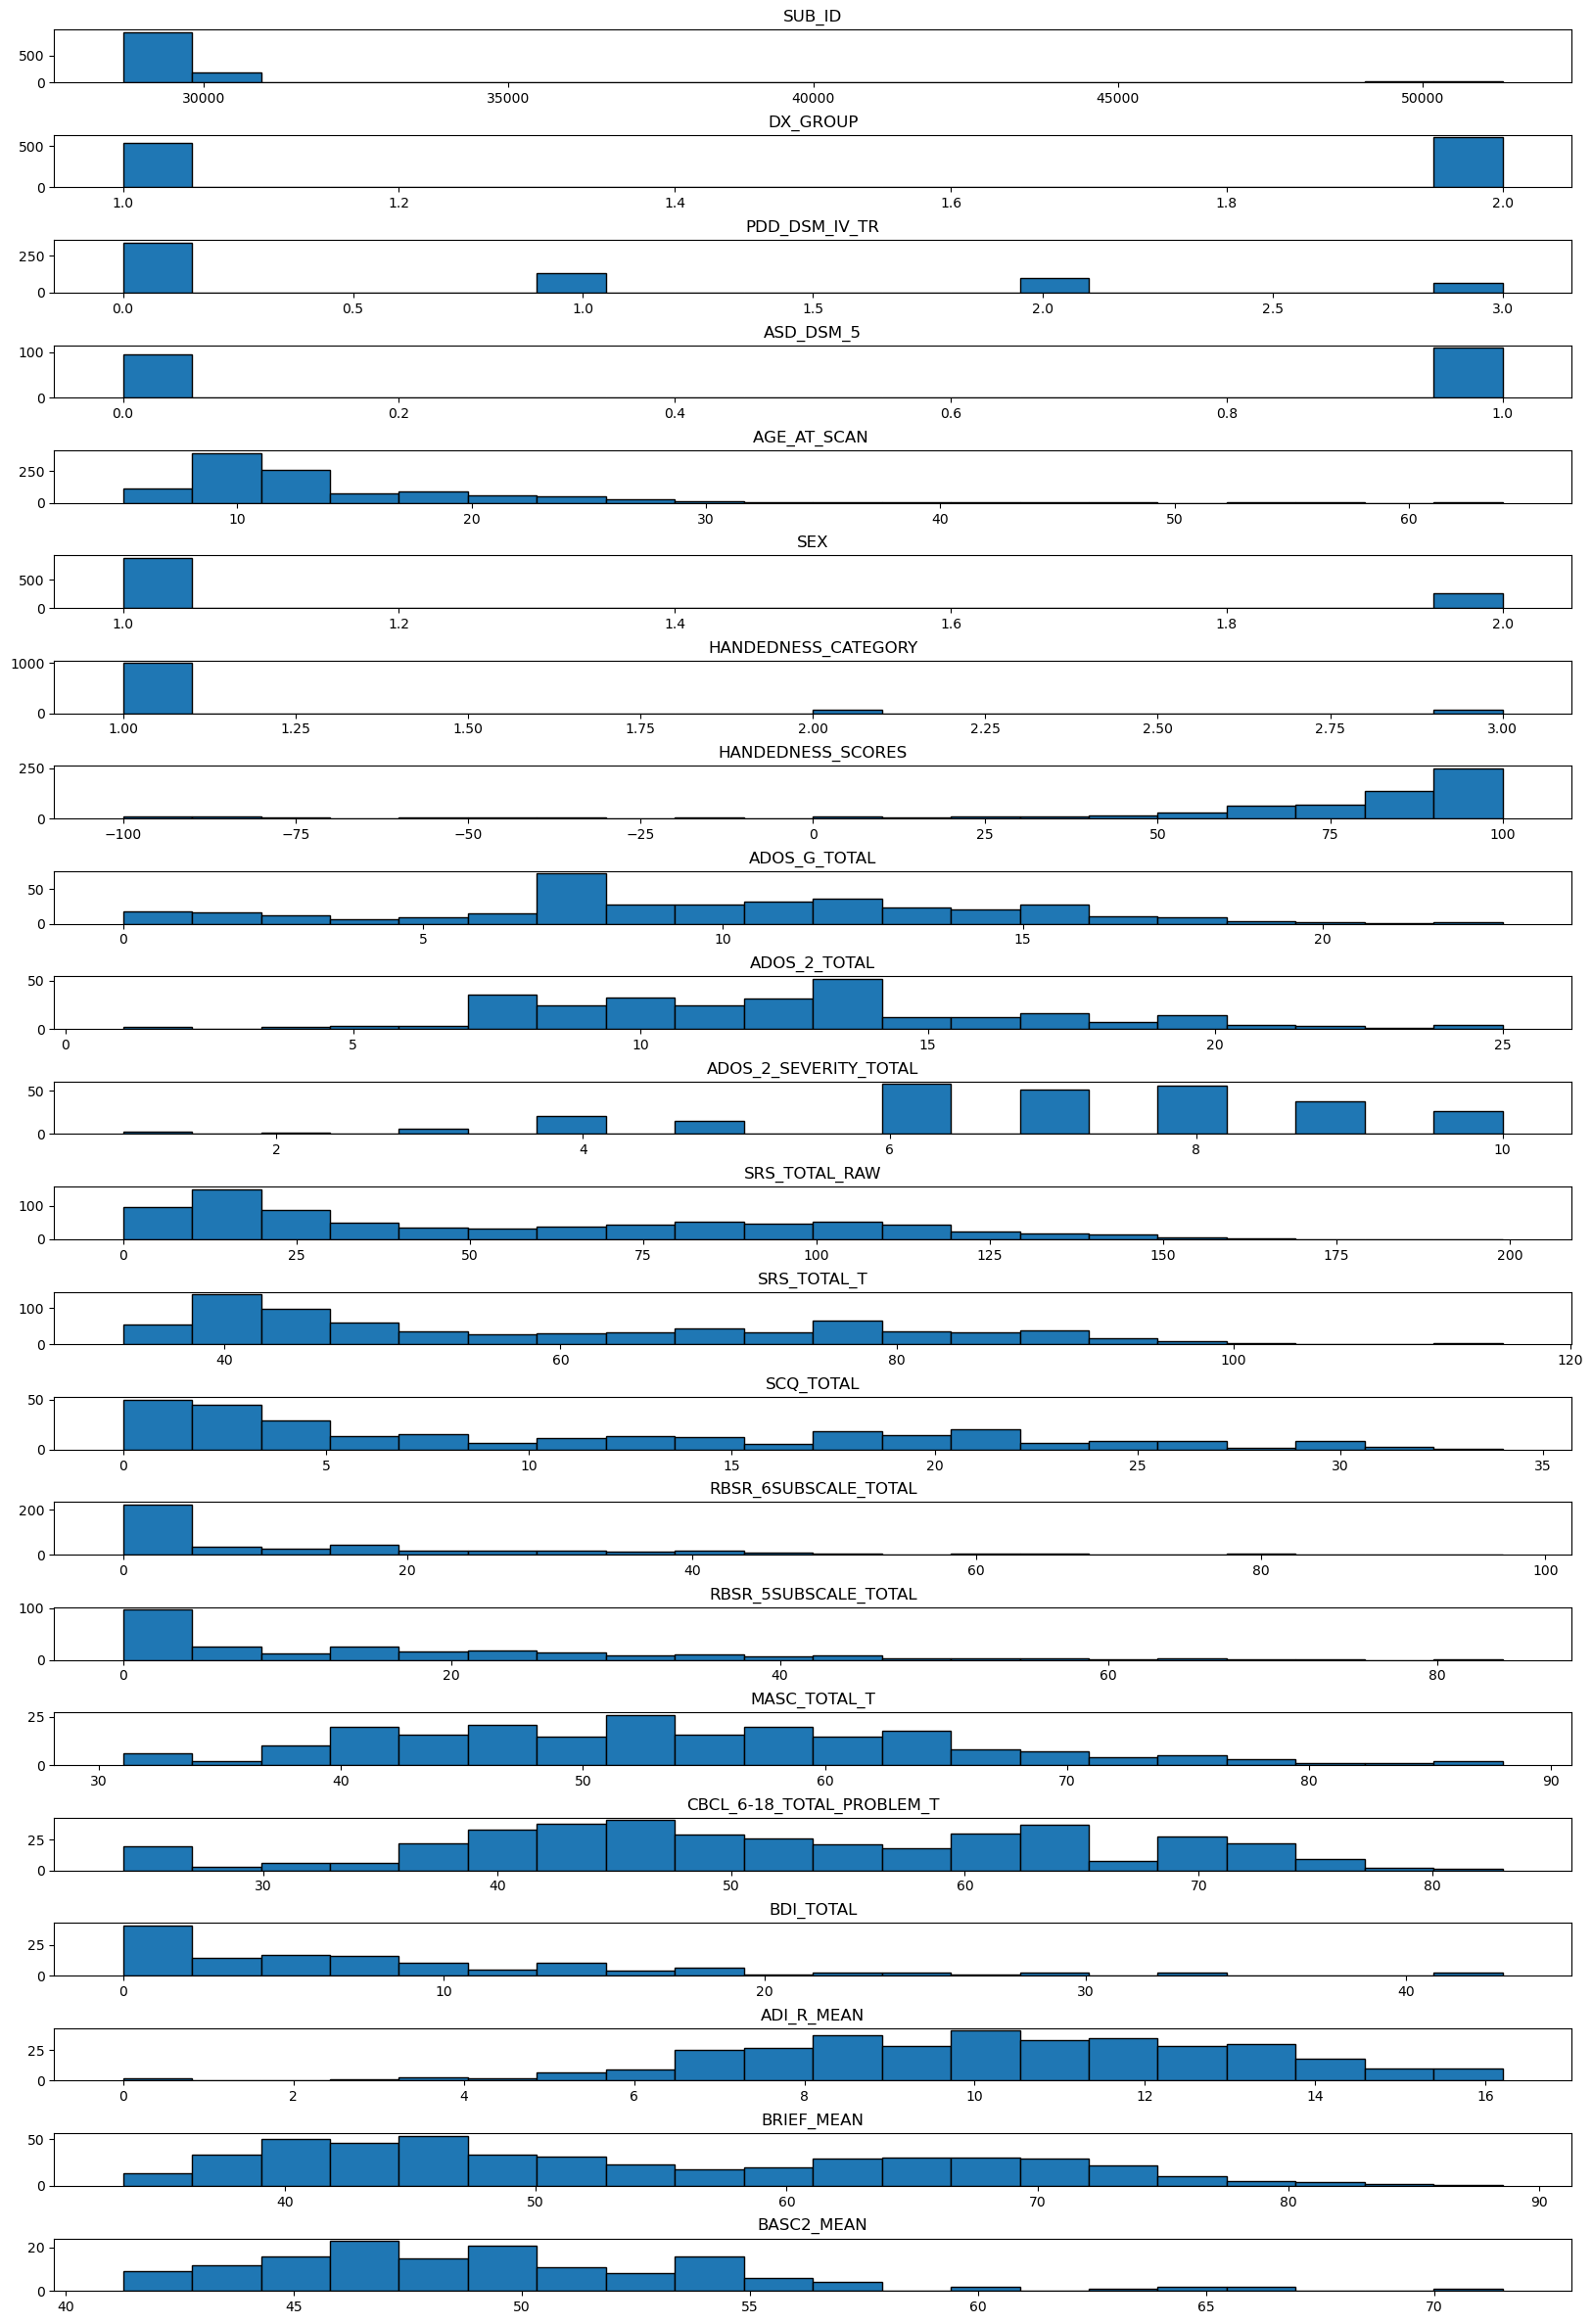

In [233]:
# Select the numeric columns
numeric_columns = df_ASD.select_dtypes(include=['int64', 'float64']).columns

# Create a figure with a subplot for each numeric column
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(20, 30))

# Set the figure's margins
fig.subplots_adjust(hspace=1, wspace=1)

# Create a histogram for each numeric column
for ax, column in zip(axes, numeric_columns):
    ax.hist(df_ASD[column], bins=20, edgecolor='k')
    ax.set_title(column)

# Show the plot
plt.show()


### Plot Categorical Columns
I ploted each one of the categorical columns to find out their distribution along the ASD and No-ASD categories

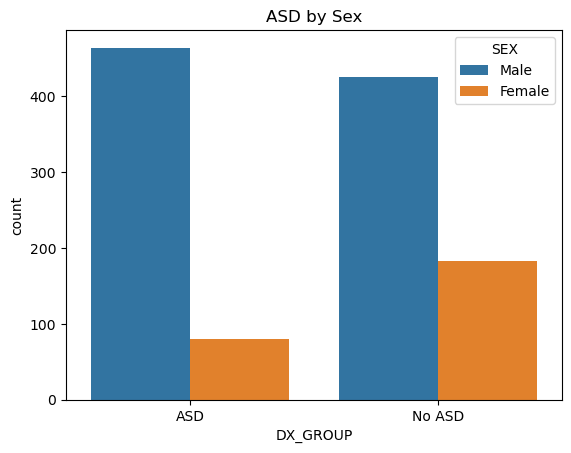

In [234]:
# Create a bar plot for the sex column
sns.countplot(x='DX_GROUP', hue=df_ASD['SEX'].map({1:"Male", 2:"Female"}), data=df_ASD)

# Set actual diagnosis instead of DX_Group=1 or 2
plt.xticks([0,1], ["ASD", "No ASD"])

# Add a title
plt.title('ASD by Sex')

# Show the plot
plt.show()


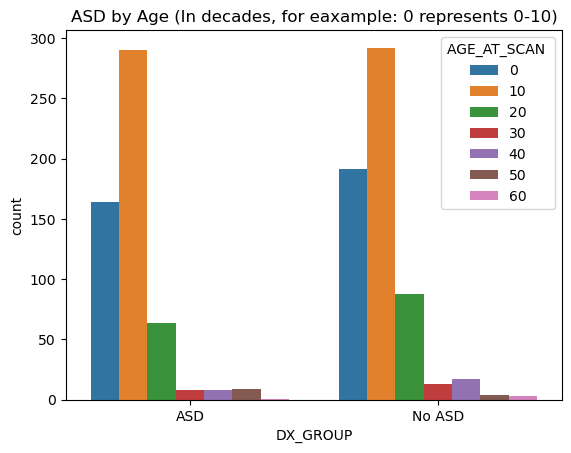

In [235]:
# Create a bar plot for the AGE column
sns.countplot(x='DX_GROUP', hue=(((df_ASD['AGE_AT_SCAN '].astype(int))/10).astype(int))*10, data=df_ASD)

# Set actual diagnosis instead of DX_Group=1 or 2
plt.xticks([0,1], ["ASD", "No ASD"])

# Add a title
plt.title('ASD by Age (In decades, for eaxample: 0 represents 0-10)')

# Show the plot
plt.show()



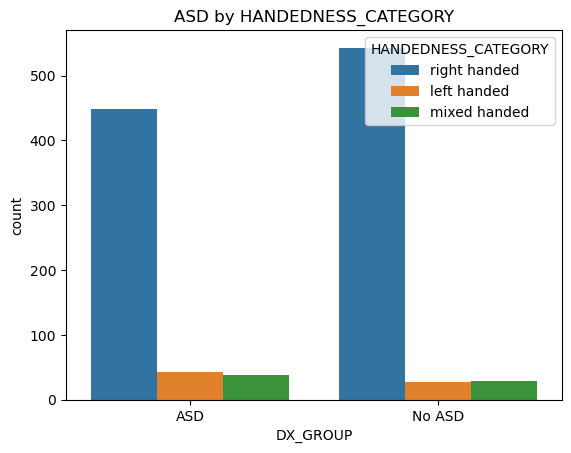

In [236]:
# Create a bar plot for the HANDEDNESS_CATEGORY column
sns.countplot(x='DX_GROUP', hue=df_ASD['HANDEDNESS_CATEGORY'].map({1:"right handed", 2:"left handed", 3:"mixed handed"}), data=df_ASD)

# Set actual diagnosis instead of DX_Group=1 or 2
plt.xticks([0,1], ["ASD", "No ASD"])

# Add a title
plt.title('ASD by HANDEDNESS_CATEGORY')

# Show the plot
plt.show()

### Correlations Analysis - using Heatmap 
Showing the correlation of each numeric column with all other numeric columns (including our target column - DX_GROUP)
We wish to keep the columns highly correlated to DX_GROUP
Also, we want to discard of non-target columns which show high correlation between themselves (keep one of them and drop the other)



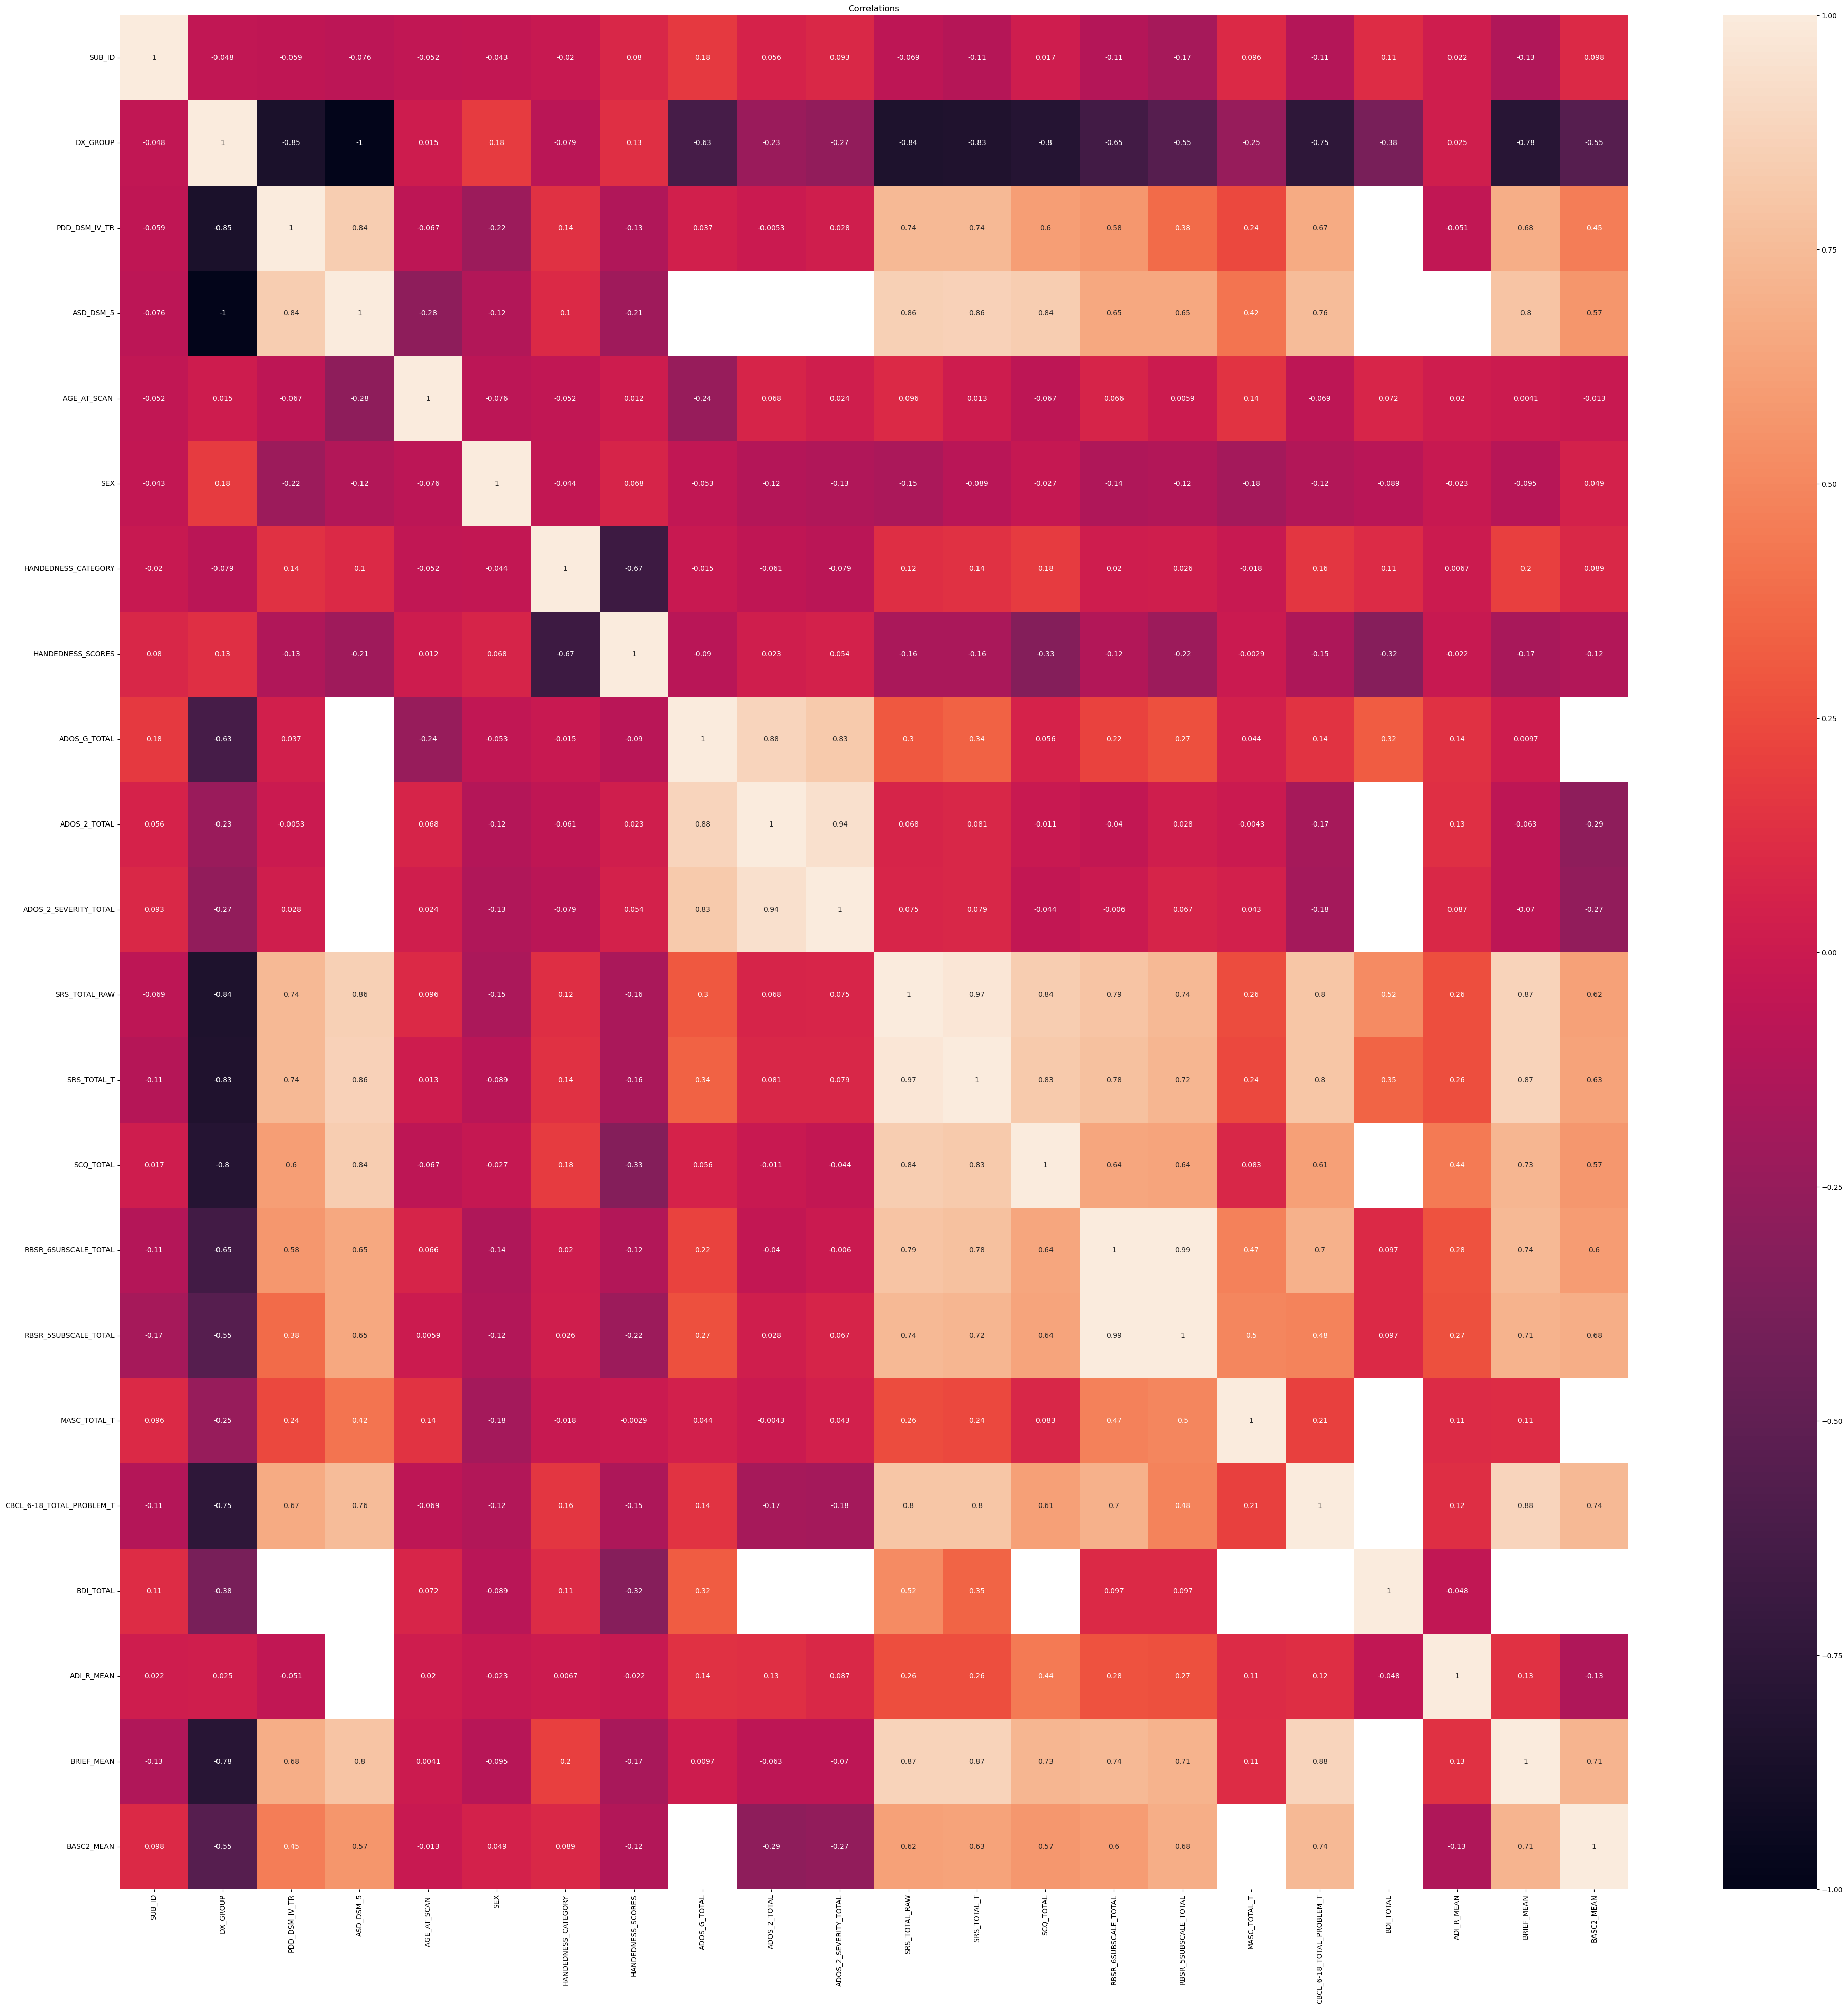

In [237]:
# Create a figure with a heatmap for the correlations
fig, ax = plt.subplots(figsize=(48, 48))
sns.heatmap(df_ASD.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlations')

# Show the plot
plt.show()


### 4th phase of Feature Selection - removing one feature from each pair of highly correlated non-target features

In [238]:
# Remove one of highly correlated column-pair
df_ASD = df_ASD.drop(['ADOS_2_SEVERITY_TOTAL', 'HANDEDNESS_SCORES', 'SRS_TOTAL_RAW', 'RBSR_5SUBSCALE_TOTAL'],axis=1)
df_ASD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 74
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SUB_ID                     1152 non-null   int64  
 1   NDAR_GUID                  310 non-null    object 
 2   DX_GROUP                   1152 non-null   int64  
 3   PDD_DSM_IV_TR              633 non-null    float64
 4   ASD_DSM_5                  205 non-null    float64
 5   AGE_AT_SCAN                1152 non-null   float64
 6   SEX                        1152 non-null   int64  
 7   HANDEDNESS_CATEGORY        1129 non-null   float64
 8   ADOS_G_TOTAL               369 non-null    float64
 9   ADOS_2_TOTAL               283 non-null    float64
 10  SRS_TOTAL_T                756 non-null    float64
 11  SCQ_TOTAL                  293 non-null    float64
 12  RBSR_6SUBSCALE_TOTAL       451 non-null    float64
 13  MASC_TOTAL_T               216 non-null    float64

### 5th phase of Feature Selection - selecting the best correlated features to ASD (target=DX_GROUP)

In [239]:
# Create a Dataframe containing the features showing the highest correlation to ASD (DX_GROUP)
df_ASD_Pred = df_ASD[['PDD_DSM_IV_TR', 'ASD_DSM_5', 'SRS_TOTAL_T', 'SCQ_TOTAL', 'RBSR_6SUBSCALE_TOTAL', 'CBCL_6-18_TOTAL_PROBLEM_T', 'BRIEF_MEAN', 'ADOS_G_TOTAL']]

df_ASD_Pred.head(200)

,PDD_DSM_IV_TR,ASD_DSM_5,SRS_TOTAL_T,SCQ_TOTAL,RBSR_6SUBSCALE_TOTAL,CBCL_6-18_TOTAL_PROBLEM_T,BRIEF_MEAN,ADOS_G_TOTAL
0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,11.0
1,NaN,NaN,65.0,NaN,12.0,NaN,NaN,14.0
2,NaN,NaN,57.0,NaN,15.0,NaN,NaN,7.0
3,NaN,NaN,56.0,NaN,13.0,NaN,NaN,12.0
4,NaN,NaN,87.0,NaN,20.0,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...
195,1.0,NaN,68.0,NaN,NaN,65.0,61.090909,NaN
196,1.0,NaN,67.0,NaN,NaN,57.0,59.272727,NaN
197,1.0,NaN,83.0,NaN,NaN,57.0,56.090909,NaN
198,1.0,NaN,65.0,NaN,NaN,63.0,53.818182,NaN


## Preprocessing of the selected columns


In [240]:
# We saw in the histograms that the RBSR, SCQ and SRS fields were skewed. I handeled it -  

df_ASD_Pred['SRS_TOTAL_T'] = np.log1p(df_ASD_Pred['SRS_TOTAL_T'])
df_ASD_Pred['SCQ_TOTAL'] = np.log1p(df_ASD_Pred['SCQ_TOTAL'])
df_ASD_Pred['RBSR_6SUBSCALE_TOTAL'] = np.log1p(df_ASD_Pred['RBSR_6SUBSCALE_TOTAL'])

numeric_features = df_ASD_Pred.select_dtypes(include=['float', 'int']).columns
print (numeric_features)

# Standardize numeric values and filling NaN values (using KNN imputer as there are many missing values)
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

df_ASD_Pred.head(200)

Index(['PDD_DSM_IV_TR', 'ASD_DSM_5', 'SRS_TOTAL_T', 'SCQ_TOTAL',
       'RBSR_6SUBSCALE_TOTAL', 'CBCL_6-18_TOTAL_PROBLEM_T', 'BRIEF_MEAN',
       'ADOS_G_TOTAL'],
      dtype='object')


,PDD_DSM_IV_TR,ASD_DSM_5,SRS_TOTAL_T,SCQ_TOTAL,RBSR_6SUBSCALE_TOTAL,CBCL_6-18_TOTAL_PROBLEM_T,BRIEF_MEAN,ADOS_G_TOTAL
0,NaN,NaN,4.382027,NaN,NaN,NaN,NaN,11.0
1,NaN,NaN,4.189655,NaN,2.564949,NaN,NaN,14.0
2,NaN,NaN,4.060443,NaN,2.772589,NaN,NaN,7.0
3,NaN,NaN,4.043051,NaN,2.639057,NaN,NaN,12.0
4,NaN,NaN,4.477337,NaN,3.044522,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...
195,1.0,NaN,4.234107,NaN,NaN,65.0,61.090909,NaN
196,1.0,NaN,4.219508,NaN,NaN,57.0,59.272727,NaN
197,1.0,NaN,4.430817,NaN,NaN,57.0,56.090909,NaN
198,1.0,NaN,4.189655,NaN,NaN,63.0,53.818182,NaN


# Classification

## Split into train-test
Keep a random 25% of the samples (rows) for test

In [241]:

# Split data into training and testing sets
X = df_ASD_Pred
y = df_ASD['DX_GROUP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [242]:
X_train = X_train[['PDD_DSM_IV_TR', 'ASD_DSM_5', 'SRS_TOTAL_T', 'SCQ_TOTAL', 'RBSR_6SUBSCALE_TOTAL', 'CBCL_6-18_TOTAL_PROBLEM_T', 'BRIEF_MEAN', 'ADOS_G_TOTAL']]
X_train.head(200)

,PDD_DSM_IV_TR,ASD_DSM_5,SRS_TOTAL_T,SCQ_TOTAL,RBSR_6SUBSCALE_TOTAL,CBCL_6-18_TOTAL_PROBLEM_T,BRIEF_MEAN,ADOS_G_TOTAL
962,2.0,NaN,4.262680,2.079442,1.945910,51.0,NaN,7.0
658,0.0,NaN,3.737670,0.693147,NaN,52.0,67.000000,NaN
556,0.0,NaN,3.806662,NaN,NaN,NaN,41.090909,NaN
989,NaN,1.0,4.248495,3.555348,2.890372,NaN,NaN,NaN
370,2.0,NaN,4.317488,NaN,2.944439,68.0,66.363636,17.0
...,...,...,...,...,...,...,...,...
177,2.0,NaN,4.488636,NaN,NaN,56.0,62.545455,8.0
275,2.0,1.0,NaN,NaN,3.465736,NaN,NaN,12.0
529,0.0,NaN,3.761200,NaN,0.000000,49.0,43.818182,NaN
412,0.0,NaN,3.737670,NaN,0.693147,43.0,41.818182,NaN


## Fit-Test-Evaluate
I used 5 different classification models: Logistic Regression, KNN, Support Vector Machine, Decision Tree and Random Forest.

In [243]:


# Create a pipeline for logistic regression
logistic_pipeline = Pipeline([
    ('column_transformer', preprocessor),
    ('classifier', LogisticRegression())
])

# Create a grid of hyperparameters for logistic regression
logistic_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__max_iter': [500]
}


# Create a pipeline for KNN
KNN_pipeline = Pipeline([
    ('column_transformer', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Create a grid of hyperparameters for KNN
KNN_param_grid = {
    'classifier__n_neighbors': [8, 9, 10],
    'classifier__leaf_size': [2, 4, 6, 8, 10, 12]
}

# Create a pipeline for support vector machine
svm_pipeline = Pipeline([
    ('column_transformer', preprocessor),
    ('classifier', SVC())
])

# Create a grid of hyperparameters for support vector machine
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Create a pipeline for decision tree
tree_pipeline = Pipeline([
    ('column_transformer', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Create a grid of hyperparameters for decision tree
tree_param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_leaf': [1, 2, 3]
}

# Create a pipeline for Random Forest
RF_pipeline = Pipeline([
    ('column_transformer', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Create a grid of hyperparameters for random forest
RF_param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_leaf': [1, 2, 3]
}


# Create a list of pipelines and parameter grids
pipelines = [
    ('Logistic Regression', logistic_pipeline, logistic_param_grid),
    ('KNN', KNN_pipeline, KNN_param_grid),
    ('Support Vector Machine', svm_pipeline, svm_param_grid),
    ('Decision Tree', tree_pipeline, tree_param_grid),
    ('Random Forest', RF_pipeline, RF_param_grid)
]

# Loop through the pipelines and parameter grids
for name, pipeline, param_grid in pipelines:
    print(f'Fitting {name}...')
    
    # Create a GridSearchCV object for the pipeline
    gscv = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
    
    # Fit the pipeline to the training data
    gscv.fit(X_train, y_train)#, classifier__sample_weight = sw_array)
    
    # Predict and print the best parameters and score
    y_pred = gscv.predict(X_test)

    # Evaluate the pipeline on the test data
    score = gscv.score(X_test, y_test)

    print(f'Classification report:\n {classification_report(y_test,y_pred)}')
    print(f'Best parameters: {gscv.best_params_}')
    print(f'Best score: {gscv.best_score_:.2f}')
    print(f'Test score: {score:.2f}')
    print()

Fitting Logistic Regression...
Classification report:
               precision    recall  f1-score   support

           1       0.96      0.84      0.90       141
           2       0.87      0.97      0.91       147

    accuracy                           0.91       288
   macro avg       0.91      0.90      0.91       288
weighted avg       0.91      0.91      0.91       288

Best parameters: {'classifier__C': 1, 'classifier__max_iter': 500}
Best score: 0.93
Test score: 0.91

Fitting KNN...
Classification report:
               precision    recall  f1-score   support

           1       0.95      0.88      0.92       141
           2       0.89      0.96      0.92       147

    accuracy                           0.92       288
   macro avg       0.92      0.92      0.92       288
weighted avg       0.92      0.92      0.92       288

Best parameters: {'classifier__leaf_size': 6, 'classifier__n_neighbors': 8}
Best score: 0.94
Test score: 0.92

Fitting Support Vector Machine...
Class

## Now, let's try and do this faster - using PCA and Clustering

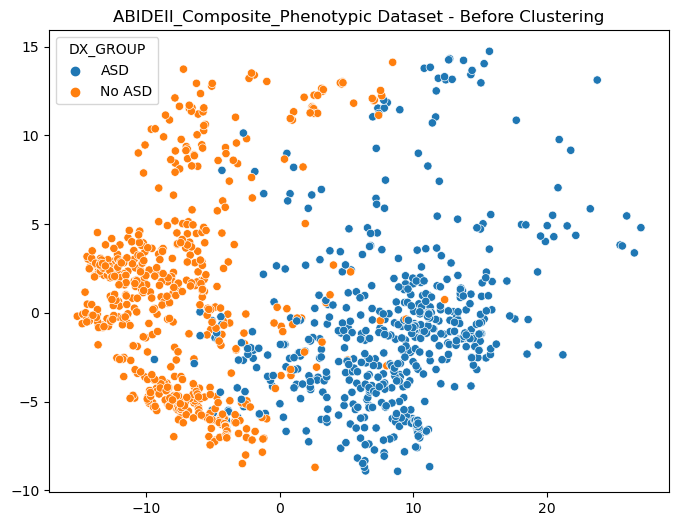

In [244]:
# Starting again from the original dataframe df (not using any of the previous data selection phases)
numeric_features = df.select_dtypes(include=['float', 'int']).columns

X = df[numeric_features.values].drop('DX_GROUP',axis=1)
y = df['DX_GROUP']

# Filling NaN values (using KNN imputer as there are many missing values)
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Visualize the data with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Create a figure with a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=y.map({1:"ASD", 2:"No ASD"}), ax=ax)

# Add a title
plt.title('ABIDEII_Composite_Phenotypic Dataset - Before Clustering')

# Show the plot
plt.show()


### Fit-Predict and evaluate KMeans results

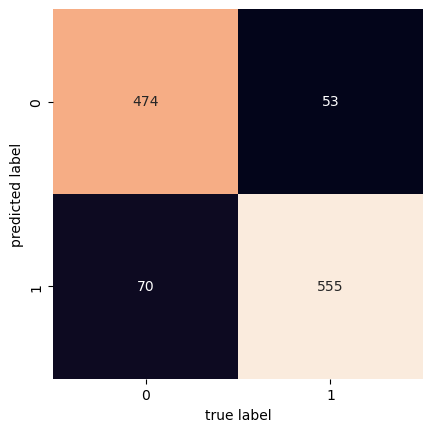

In [245]:
# Define hyperparameters for kmeans: 2 clusters since we want to find ASD vs. No ASD groups
kmeans = KMeans(n_clusters=2, random_state=42)

# Generate predictions with the model using our X values (reduced by PCA)
y_pred = kmeans.fit_predict(reduced_data)

# Get the confusion matrix
y = y.map({1:0, 2:1}) # Mapping DX_GROUP into 0=ASD vs. 1=No ASD
mat = confusion_matrix(y,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

### Clusters Visualization

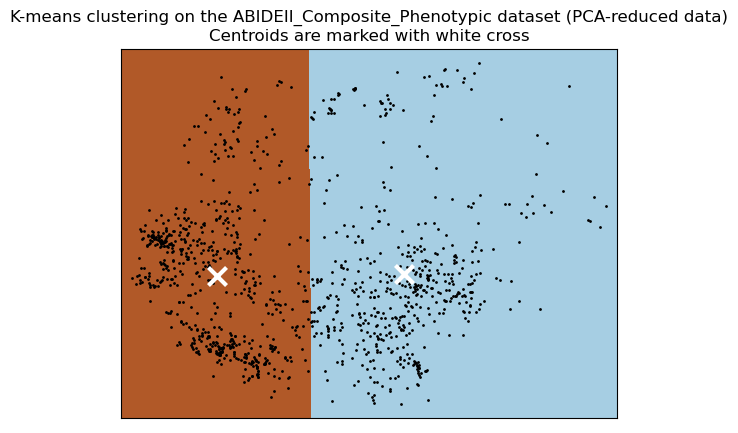

In [246]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last applied kmeans model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

# Plot the centroids as a white x
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the ABIDEII_Composite_Phenotypic dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()